## Hypothesis testing on NBA player performance

Analysing Player performance stats after for the regular NBA season 2020-2021.
The aim of the present study is to test if the players in different classic postions have significantly different values of performance variables.

A test for the null hypothesis that 2 independent samples have identical average. Here, the samples being, values of performance variables corresponding to all the five distinct positions.

* **Null hypothesis**: Average value of a performance metric 'p' is same for all the positions. 
    * H0: μ1 = μ2 = · · · = μ5
* **Alternative hypothesis**: Average value of a performance metric 'p' is not same for all the positions.
    * H1: At least two of the means are not equal.

## Importing Relevant Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mno
sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset(s)

In [3]:
#reading data
players = pd.read_csv('../input/nba-players-data-1950-to-2021/player_data.csv')
seasons_stats = pd.read_csv('../input/nba-players-data-1950-to-2021/seasons_stats.csv', index_col = 0)

### Rudimentary inspection of dataset.

In [4]:
players.shape, seasons_stats.shape

((4979, 8), (27352, 50))

In [5]:
seasons_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,21.0,82.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN


In [6]:
seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27352 entries, 0 to 27422
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    27352 non-null  float64
 1   Player  27352 non-null  object 
 2   Pos     27352 non-null  object 
 3   Age     27344 non-null  float64
 4   Tm      27352 non-null  object 
 5   G       27352 non-null  float64
 6   GS      20961 non-null  float64
 7   MP      26866 non-null  float64
 8   FG      27352 non-null  float64
 9   FGA     27352 non-null  float64
 10  FG%     27239 non-null  float64
 11  3P      21655 non-null  float64
 12  3PA     21655 non-null  float64
 13  3P%     17962 non-null  float64
 14  2P      27352 non-null  float64
 15  2PA     27352 non-null  float64
 16  2P%     27179 non-null  float64
 17  eFG%    27239 non-null  float64
 18  FT      27352 non-null  float64
 19  FTA     27352 non-null  float64
 20  FT%     26331 non-null  float64
 21  ORB     23525 non-null  float64
 22

In [7]:
#statistical summary of numerical columns in seasons_stats

seasons_stats.describe()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,27352.000000,27344.000000,27352.000000,20961.000000,26866.00000,27352.000000,27352.000000,27239.000000,21655.000000,21655.000000,...,22297.000000,22368.000000,27313.000000,27313.000000,27313.000000,26829.000000,23525.000000,23525.000000,23525.000000,23525.000000
mean,1995.279614,26.597608,49.800271,22.931969,1179.36924,191.013052,420.671688,0.431854,24.944401,70.984853,...,14.797533,18.851641,1.227214,1.195819,2.424208,0.065659,-1.747643,-0.512548,-2.260089,0.544982
std,18.403073,3.873533,26.516151,28.166115,928.76463,185.558391,392.464513,0.097926,41.307258,109.553575,...,6.925300,5.484929,2.091940,1.244676,3.001926,0.104268,4.042330,2.244615,5.013543,1.309428
min,1950.000000,18.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.100000,-1.000000,-2.800000,-2.519000,-73.800000,-31.100000,-86.700000,-2.600000
25%,1983.000000,24.000000,26.000000,0.000000,325.00000,39.000000,95.000000,0.393000,0.000000,1.000000,...,11.100000,15.300000,-0.100000,0.200000,0.200000,0.031000,-3.400000,-1.600000,-4.100000,-0.200000
50%,1998.000000,26.000000,56.000000,8.000000,1018.00000,136.000000,309.000000,0.439000,4.000000,15.000000,...,13.900000,18.500000,0.400000,0.800000,1.300000,0.076000,-1.500000,-0.500000,-1.800000,0.000000
75%,2011.000000,29.000000,75.000000,43.000000,1917.00000,291.000000,645.000000,0.481000,33.000000,99.000000,...,17.400000,22.100000,1.900000,1.800000,3.700000,0.115000,0.300000,0.700000,0.300000,0.800000
max,2021.000000,44.000000,88.000000,83.000000,3882.00000,1597.000000,3159.000000,1.000000,402.000000,1028.000000,...,100.000000,100.000000,18.300000,16.000000,25.400000,2.712000,199.400000,46.800000,242.200000,12.400000


## Data Cleaning and Initial Preperation

In [8]:
df = seasons_stats.copy()
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,21.0,82.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN


In [9]:
#cheking for duplicates in Player data

players.duplicated().any()

True

In [10]:
#dropping duplicates

players = players[~players.duplicated()]
players.duplicated().any()

False

In [11]:
#cheking for duplicates in seasons' data

df.duplicated().any()

False



> There are no duplicate records in dataset now.



In [12]:
#checking missing values

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

,Total Missing,Percent Missing
3P%,9390,34.33
GS,6391,23.37
3PAr,5799,21.20
3P,5697,20.83
3PA,5697,20.83
TOV%,5055,18.48
USG%,4984,18.22
TOV,4979,18.20
STL%,3832,14.01
BLK%,3832,14.01


In any given year there are some players who have played for more than one team. For such players there are also records of their cumulative stats for that year. These records can be filtered out. 

In [13]:
#filtering duplicate records for each player for every year

df = df[~df.duplicated(subset = ['Year', 'Player'], keep = 'first')]
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,340.0,936.0,...,NaN,NaN,3.6,1.2,4.8,NaN,NaN,NaN,NaN,NaN


## Player Performance Metrics (season 2020-2021)

The data represents player performance in the regular NBA season, but not every player has the same number of games played. Therefore grouping players based on total/cumulative stats is not fair.

This can be resolved by converting the metrics into **per-match** stats.

In [14]:
#defining function for per game statistics

def per_game(x):
    return round(x/df_21['G'], 3)

In [15]:
# dataset for 2020-21 NBA regular season

df_21 = df[df['Year'] == float(2021)]
df_21.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
26718,2021.0,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
26719,2021.0,Jaylen Adams,PG,24.0,MIL,7.0,0.0,18.0,1.0,8.0,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
26720,2021.0,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
26721,2021.0,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
26722,2021.0,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3


**Variables that are indicative of performance:**

1. 'PTS' : Points Scored
2. 'FG' : Field Goals Made
3. 'FGA' : Field Goals Attempted
4. 'FG%' : Field Goals %
5. '3P' : 3-Point Field Goals Made
6. '3PA' : 3-Point Field Goals Attempted
7. '3P%' : 3-Point Field Goals %
8. '2P' : 2-Point Field Goals Made
9. '2PA' : 2-Point Field Goals Attempted
10. '2P%' : 2-Point Field Goals %
11. 'FT' : Free Throws Made
12. 'FTA' : Free Throws Attempted
13. 'FT%' : Free Throws %
14. 'ORB' : Offensive Rebounds
15. 'DRB' : Defensive Rebounds
16. 'AST' : Assists
17. 'STL' : Steals
18. 'BLK' : Blocks


In [16]:
features = ['Pos','G', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK']
perf_features = ['PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK']

In [17]:
df_21 = df_21[features]

#### Deriving per-match stats

In [18]:
#per-match stats

df_pmatch = df_21[['PTS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK']].apply(per_game)

#adding other columns
df_pmatch[['Pos','G','FG%', '3P%', '2P%', 'FT%']] = df_21[['Pos','G','FG%', '3P%', '2P%', 'FT%']]
df_pmatch = df_pmatch.reset_index()

df_pmatch.head()

,index,PTS,FG,FGA,3P,3PA,2P,2PA,FT,FTA,...,DRB,AST,STL,BLK,Pos,G,FG%,3P%,2P%,FT%
0,26718,4.984,2.033,3.738,0.000,0.016,2.033,3.721,0.918,1.803,...,2.213,0.475,0.328,0.459,PF,61.0,0.544,0.000,0.546,0.509
1,26719,0.286,0.143,1.143,0.000,0.286,0.143,0.857,0.000,0.000,...,0.429,0.286,0.000,0.000,PG,7.0,0.125,0.000,0.167,NaN
2,26720,7.552,3.259,5.310,0.000,0.052,3.259,5.259,1.034,2.328,...,5.190,1.914,0.931,0.655,C,58.0,0.614,0.000,0.620,0.444
3,26721,18.703,7.125,12.500,0.031,0.125,7.094,12.375,4.422,5.531,...,6.734,5.406,1.172,1.031,C,64.0,0.570,0.250,0.573,0.799
4,26722,13.538,5.385,11.385,1.192,3.077,4.192,8.308,1.577,1.808,...,3.808,1.885,0.423,1.115,C,26.0,0.473,0.388,0.505,0.872


In [19]:
df_pmatch.shape

(540, 21)

## Basketball Player Positions

In Basketball, every player has a role on court. Each team has 5 players on the court at any given time. And each player often has a unique skillset to help their team win. Five distinct positions on court are

* **Point Guard:** Initiates offensive plays with great passing and dribbling skills.
* **Shooting Guard:** Positions on the wing with strong 3-point shooting ability.
* **Small Forward:** Versatile shooter who can drive to the basket.
* **Power Forward:** Strong inside presence; scores close and mid-range shots.
* **Center:** Scores near the basket with strong rebounding and blocking

In [20]:
#creating a copy

df_m = df_pmatch[df_pmatch['Pos'].isin(['PF', 'PG', 'C', 'SG', 'SF'])].copy()

In [21]:
#counts of players in different roles
df_m.Pos.value_counts()

SG    123
PF    111
PG    102
C      98
SF     90
Name: Pos, dtype: int64

### Average statistics for players in each of the five classic positions.

In [22]:
df_avg = df_m.groupby('Pos')[perf_features].mean().round(2)
df_avg

,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,AST,STL,BLK
Pos,,,,,,,,,,,,,,,,,,
C,8.50,3.33,6.21,0.53,0.42,1.25,0.23,2.91,4.96,0.58,1.42,1.99,0.69,1.69,3.93,1.26,0.49,0.86
PF,8.01,2.96,6.34,0.45,0.83,2.38,0.31,2.13,3.97,0.51,1.25,1.67,0.73,0.89,3.08,1.53,0.54,0.42
PG,9.92,3.58,8.25,0.41,1.20,3.32,0.34,2.39,4.93,0.46,1.55,1.93,0.79,0.44,2.25,3.49,0.75,0.21
SF,8.56,3.10,6.90,0.44,1.11,3.08,0.33,2.00,3.82,0.53,1.25,1.59,0.76,0.68,2.73,1.58,0.64,0.33
SG,9.55,3.44,7.95,0.41,1.37,3.81,0.33,2.07,4.14,0.50,1.30,1.61,0.79,0.47,2.21,1.99,0.64,0.26


In [23]:
# looking at 2p and 3p scored by players in the five positions

p23 = df_avg[['2P','3P']].unstack().reset_index()
p23.columns = ['FG type', 'Position', 'Average']
fig = px.bar(p23, x='Position', y='Average', color='FG type',
             title = 'Average FG made per Match', width = 1200)
fig.show()

## Hypothesis Testing
Hypothesis Testing on Performance stats of players in different positions/roles.

In [24]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [25]:
#Function for visualizing numerical variables, box plot
def box_plot2(x, y):
    ax = sns.boxplot(x = df_m[x], y = df_m[y], palette = 'tab20', showfliers = False, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(y), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

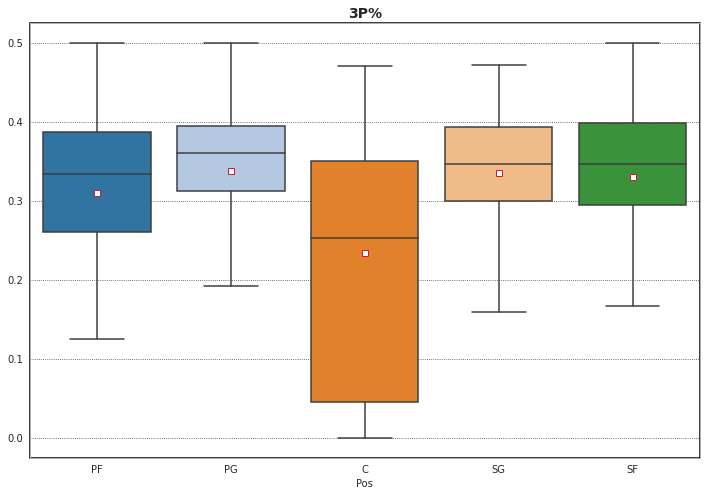

In [26]:
plt.figure(figsize = [12, 8])
box_plot2('Pos', '3P%')

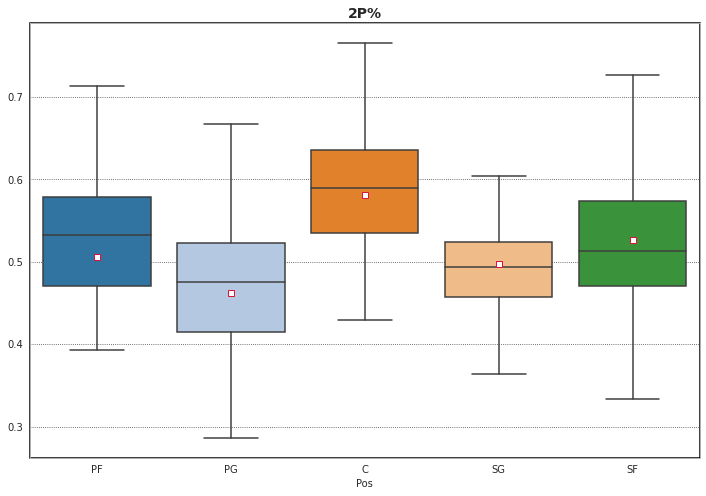

In [27]:
#2P%
plt.figure(figsize = [12, 8])
box_plot2('Pos', '2P%')

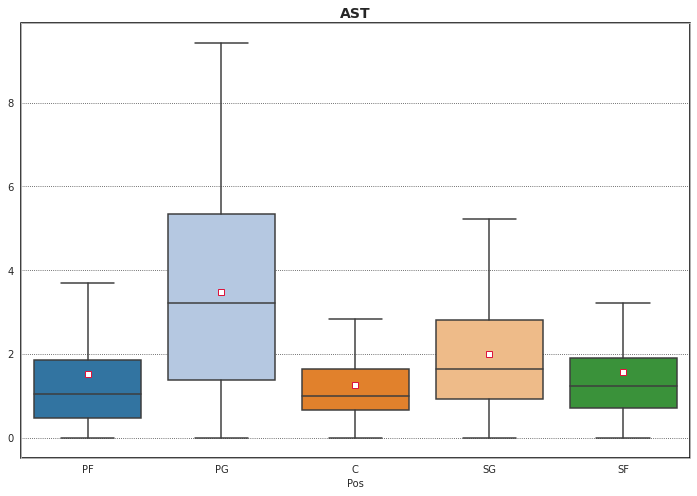

In [28]:
#AST
plt.figure(figsize = [12, 8])
box_plot2('Pos', 'AST')

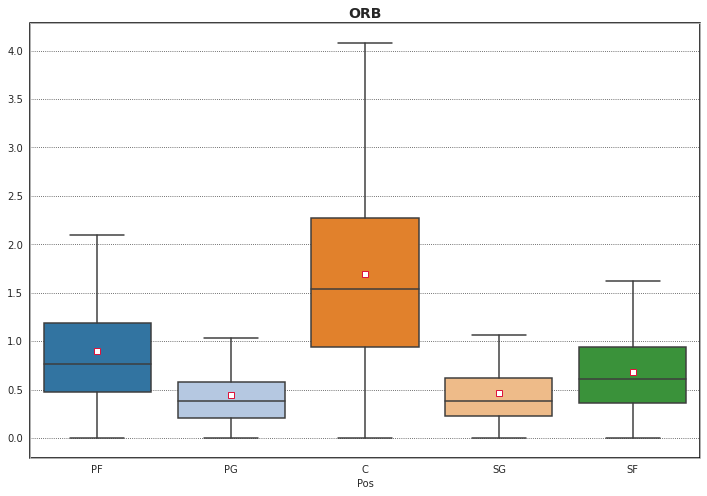

In [29]:
#BLK
plt.figure(figsize = [12, 8])
box_plot2('Pos', 'ORB')

In [30]:
df_m.Pos.unique()

array(['PF', 'PG', 'C', 'SG', 'SF'], dtype=object)

In [31]:
#seperating data by postions

PF = df_m.loc[df_m.Pos == 'PF', :]
PG = df_m.loc[df_m.Pos == 'PG', :]
C = df_m.loc[df_m.Pos == 'C', :]
SG = df_m.loc[df_m.Pos == 'SG', :]
SF = df_m.loc[df_m.Pos == 'SF', :]

### ANOVA
The test is applied to samples from 5 groups corresponding to distinct positions.

In [32]:
anova = pd.DataFrame(columns = ['statistic', 'pvalue'])
for feature in perf_features:
    f_test = f_oneway(PF[feature].dropna(), PG[feature].dropna(), C[feature].dropna(), SG[feature].dropna(), SF[feature].dropna())
    anova.loc[feature, 'statistic'] = f_test.statistic.round(4)
    anova.loc[feature, 'pvalue'] = f_test.pvalue.round(4)
anova

,statistic,pvalue
PTS,1.6136,0.1694
FG,1.2059,0.3073
FGA,4.0016,0.0033
FG%,23.3732,0.0
3P,20.1784,0.0
3PA,23.5837,0.0
3P%,11.4052,0.0
2P,3.9131,0.0039
2PA,2.5359,0.0393
2P%,13.6797,0.0


Using the above analysis, we can conclude that for different positions there is no significant difference between the means for some performance metrics but are significantly different for some performance metrics.

### Individual Comparision
Comparing each position seperately every other position.

In [33]:
t_value1,p_value1 = ttest_ind(C['PTS'], PF['PTS'], axis=0, equal_var=False)
t_value1,p_value1

(0.5973240350913885, 0.5509461407201105)

In [34]:
#function to check p-values corresponding to t-statistic of test for the null hypothesis that 2 independent samples have identical average (expected) values.

def t_test(x):
    p_values = pd.DataFrame()
    for df1 in ['PF', 'PG', 'C', 'SG', 'SF']:
        for df2 in ['PF', 'PG', 'C', 'SG', 'SF']:
            t_value, p_value = ttest_ind(eval(df1)[x].dropna(), eval(df2)[x].dropna(), axis=0, equal_var=False)
            p_values.loc[df1, df2] = round(p_value, 4)

    plt.figure(figsize = [10, 7])

    mask = np.zeros_like(p_values, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(p_values, mask = mask, annot = True, cmap = 'Blues', linecolor = 'w', linewidth = 0.2, vmax = 1, vmin = 0, annot_kws={'fontsize':12})
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.title('t-test on {}'.format(x), fontsize = 16, fontweight = 'bold')
    plt.show()

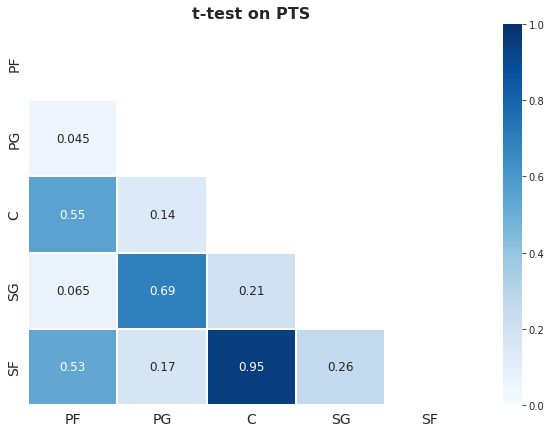

In [35]:
#PTS
t_test('PTS')

> p-values of t-test on Average points scored in almost all the cases is much higher than the significance level of 0.05. For a significance level of 5% we fail to reject the null hypothesis. This means that positions/roles, PF, PG, C, SG and SF do not have significantly diferent average points scored.

Similarly, this test can be done on all the other performance features.

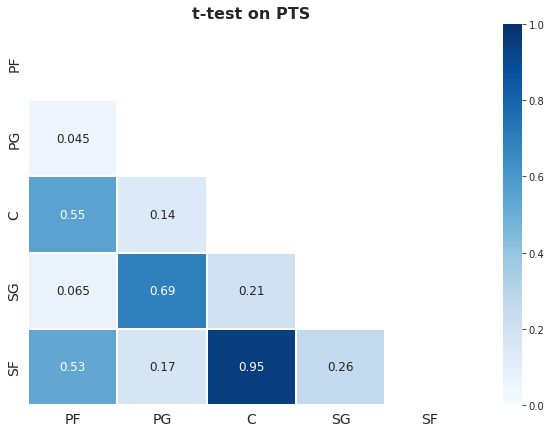

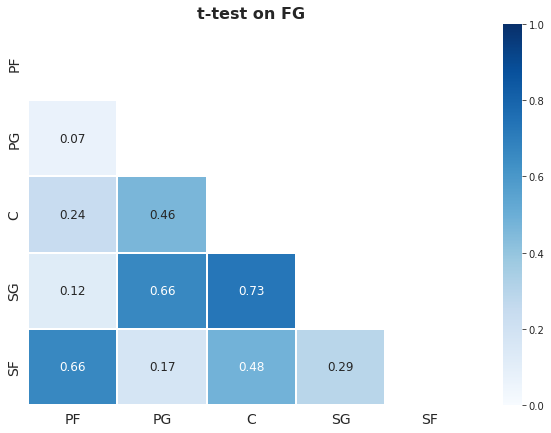

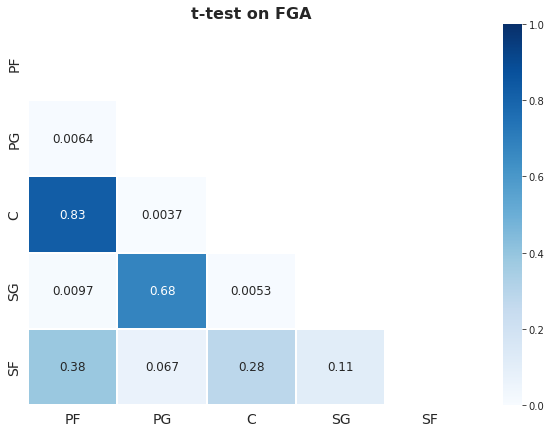

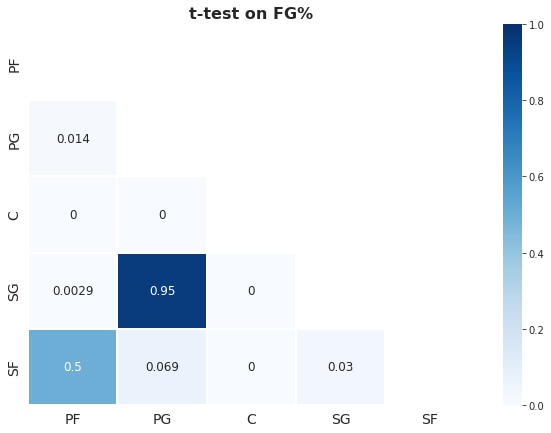

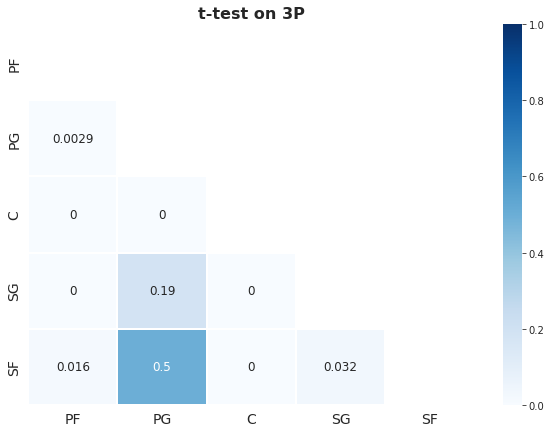

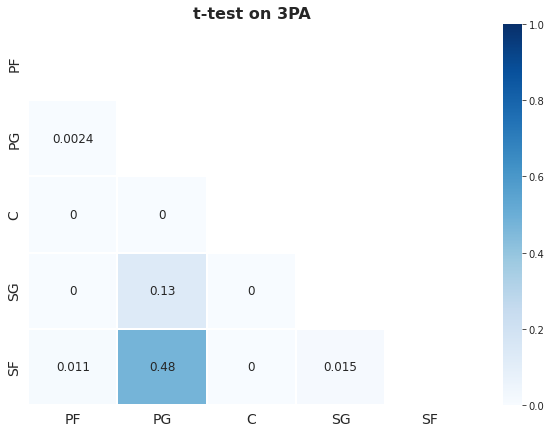

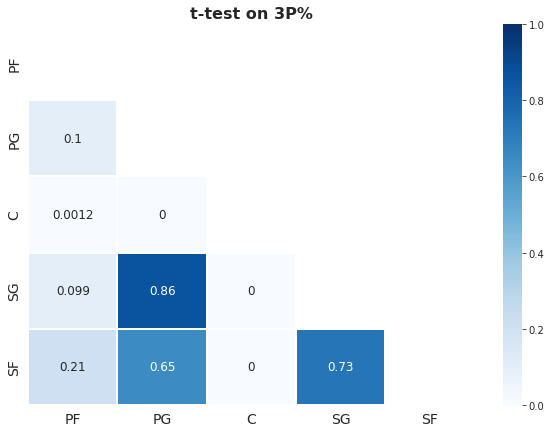

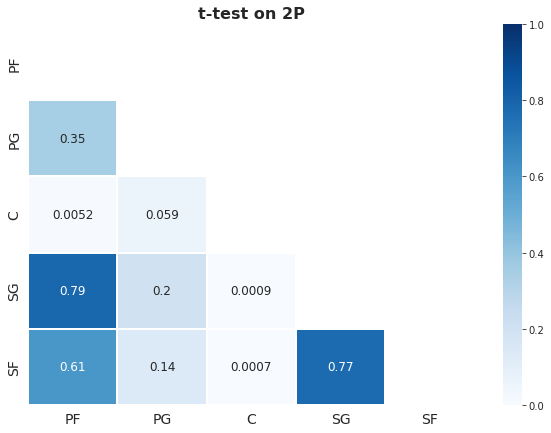

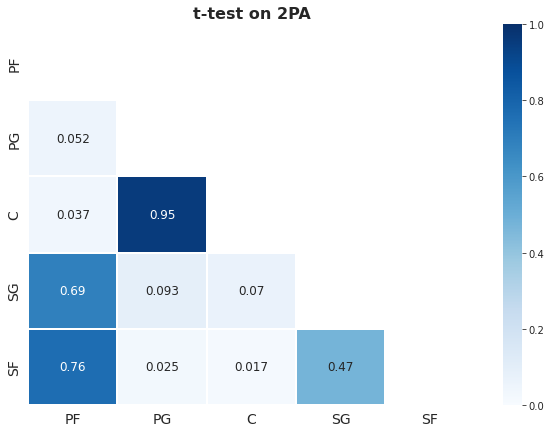

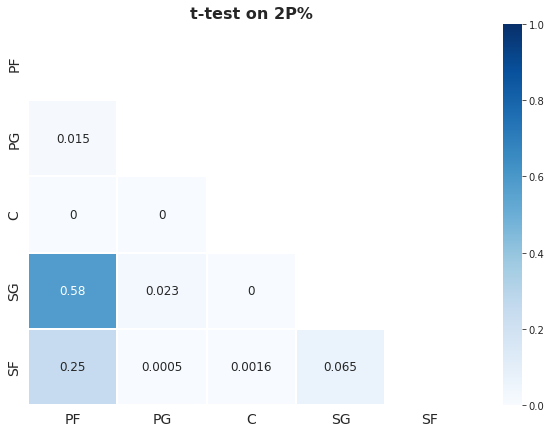

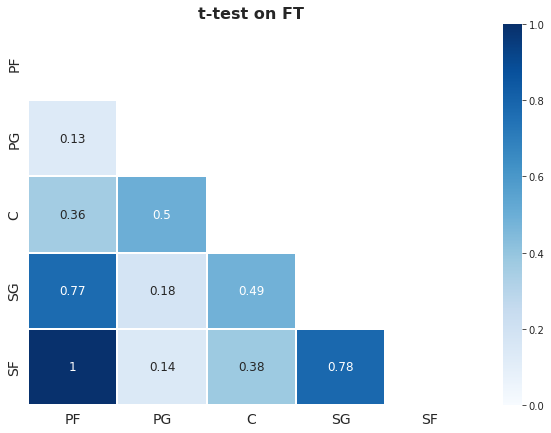

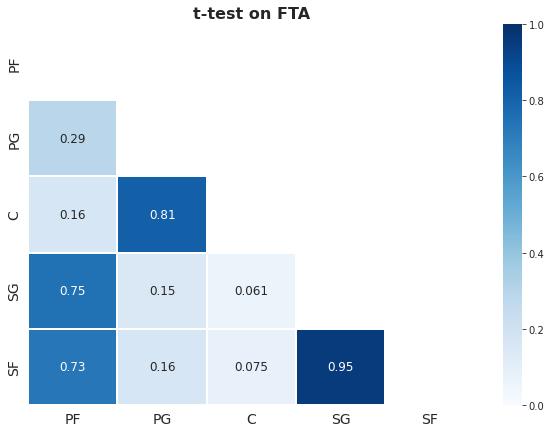

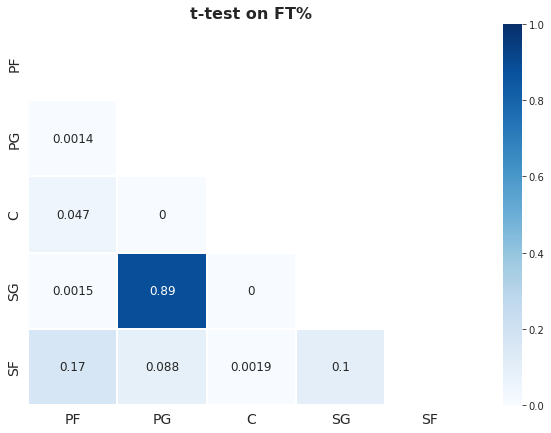

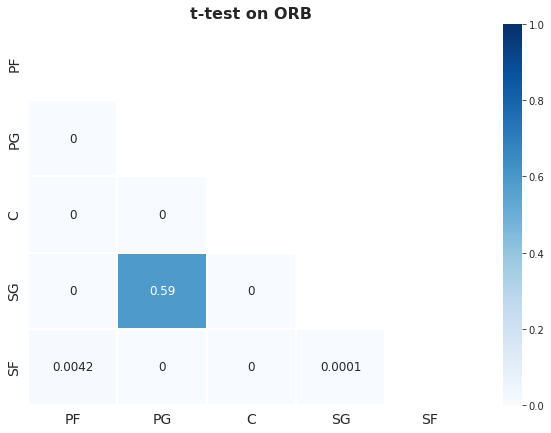

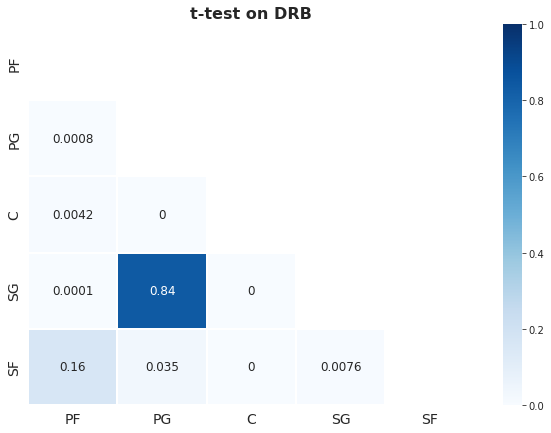

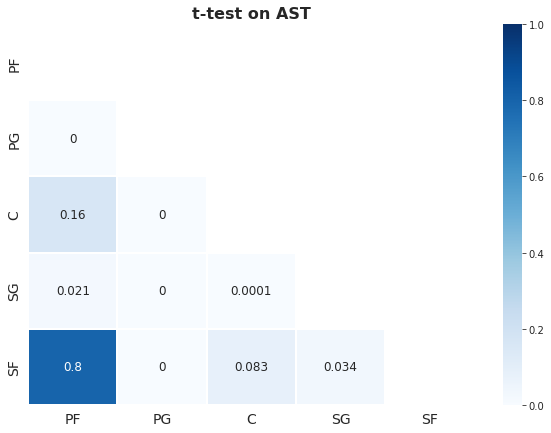

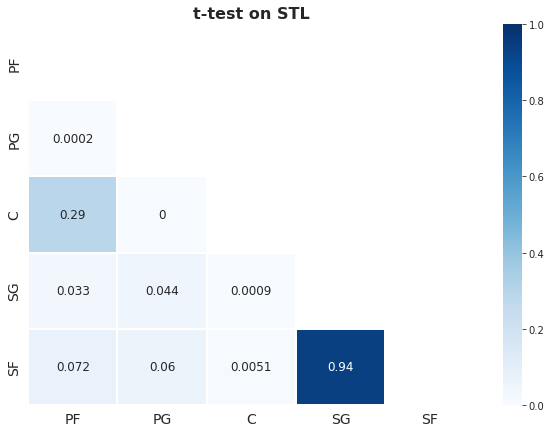

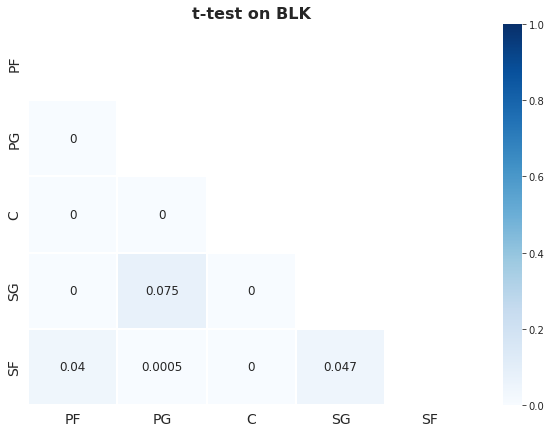

In [36]:
for k in perf_features:
    t_test(k)
    print('\n')

As evident, t-test on certain performance features results in a high p-value, which means, in such cases we fail to reject the null hypothesis and the sample means are not significantly different.

In cases where the p-value is less than significance level, say 0.05, the null hypothesis is rejected, which means the sample means are significantly(in statistical terms) different.